In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("11-iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# missing value
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df = df.drop("Id", axis=1)

In [8]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
# Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

In [10]:
for i, value in enumerate(label_encoder.classes_):
    print(i, "-" ,value)

0 - Iris-setosa
1 - Iris-versicolor
2 - Iris-virginica


In [11]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
38,4.4,3.0,1.3,0.2,0
126,6.2,2.8,4.8,1.8,2
139,6.9,3.1,5.4,2.1,2


In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


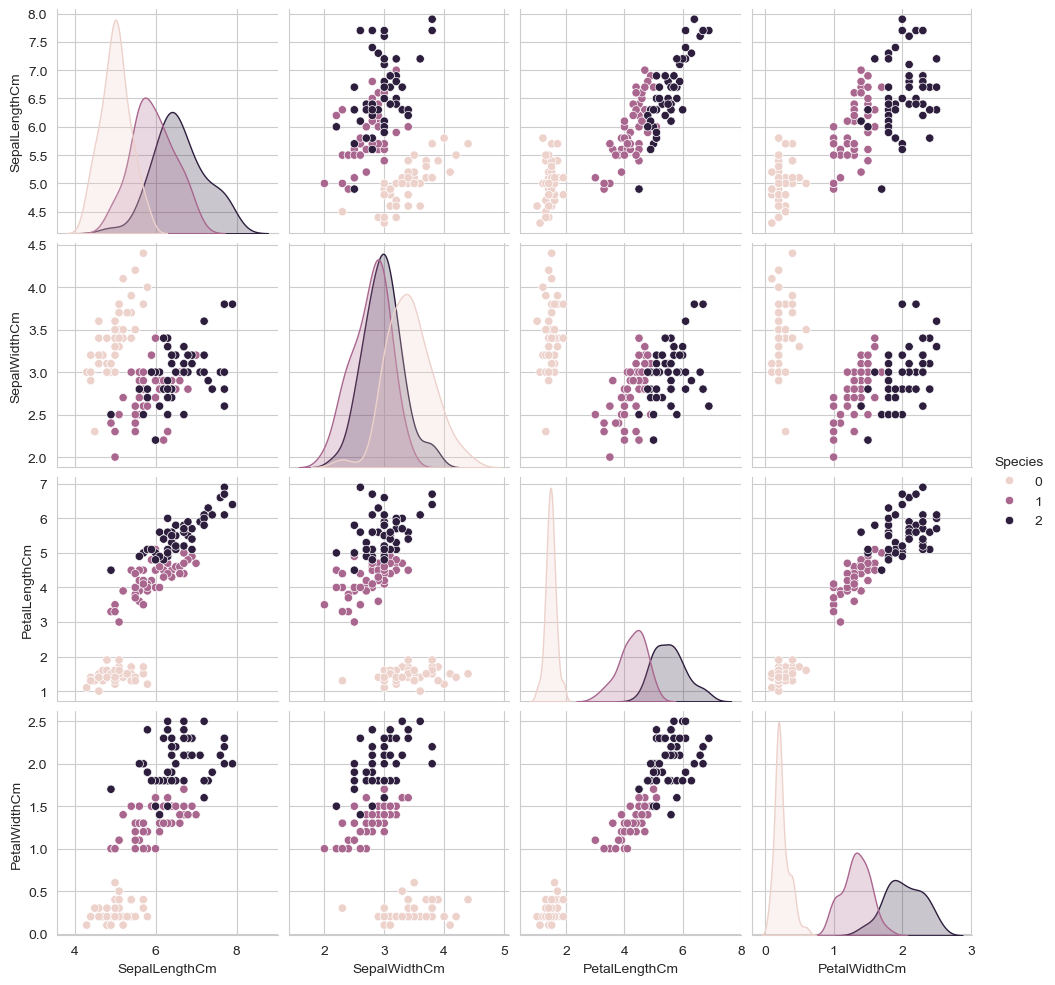

In [13]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="Species")
plt.show()

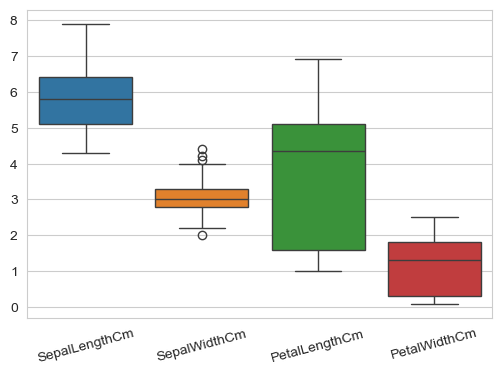

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(df.drop("Species", axis=1))
plt.xticks(rotation=15)
plt.show()

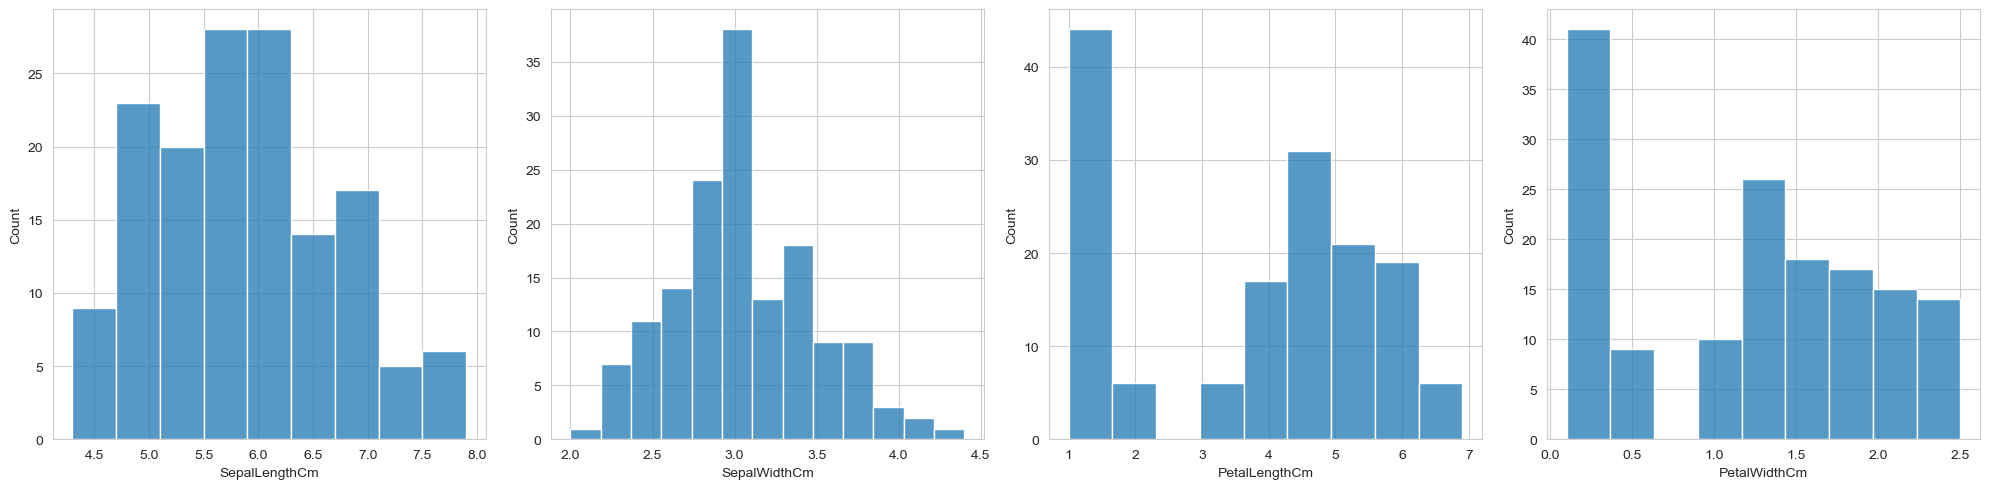

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
axs  = axs.flatten()

for i, col in enumerate(df.columns.drop("Species")):
    sns.histplot(df[col], ax=axs[i])
plt.tight_layout()    
plt.show()

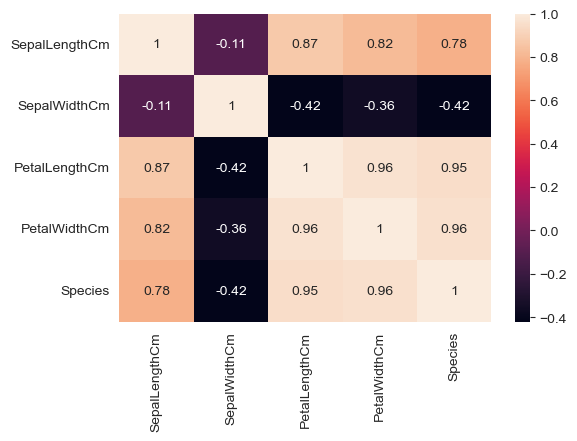

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Classification Models

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
# Independent & Dependent Features
X = df.drop("Species", axis=1)
y = df["Species"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [21]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

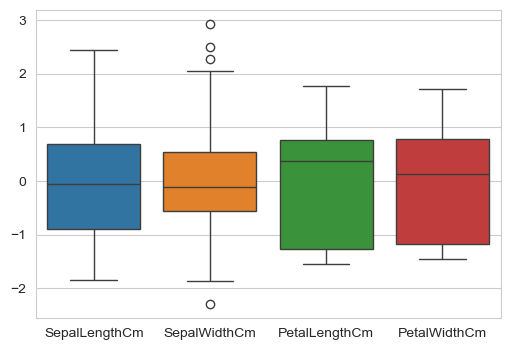

In [22]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=df.columns.drop("Species"))

plt.figure(figsize=(6,4))
sns.boxplot(X_train_scaled_df)
plt.show()

confusion_matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy score:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



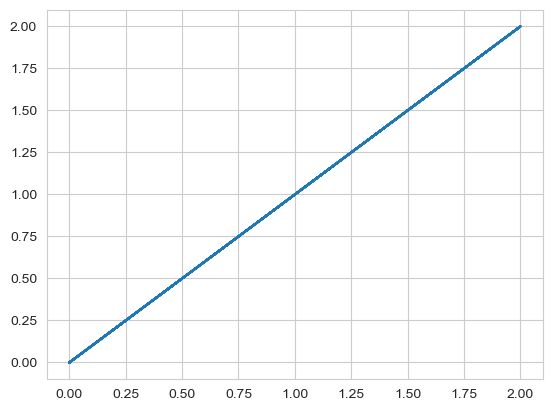

In [23]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred1 = gnb.predict(X_test_scaled)

print("confusion_matrix: \n", confusion_matrix(y_test, y_pred1))
print("accuracy score: ", accuracy_score(y_test, y_pred1))
print("classification report: ", classification_report(y_test, y_pred1))

plt.plot(y_test, y_pred1)
plt.show()

In [24]:
# Calculating train dataset score
y_pred11 = gnb.predict(X_train_scaled)
print("confusion_matrix: \n", confusion_matrix(y_train, y_pred11))
print("accuracy score: ", accuracy_score(y_train, y_pred11))
print("classification report: ", classification_report(y_train, y_pred11)) 

confusion_matrix: 
 [[38  0  0]
 [ 0 34  2]
 [ 0  3 35]]
accuracy score:  0.9553571428571429
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.92      0.94      0.93        36
           2       0.95      0.92      0.93        38

    accuracy                           0.96       112
   macro avg       0.95      0.96      0.95       112
weighted avg       0.96      0.96      0.96       112



confusion_matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy score:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[-1.04555461  1.06999863 -1.76738363 -1.62997836]
 [ 0.60008382 -0.28674049 -0.2996599  -0.76655947]
 [ 0.44547079 -0.78325814  2.06704353  2.39653783]]


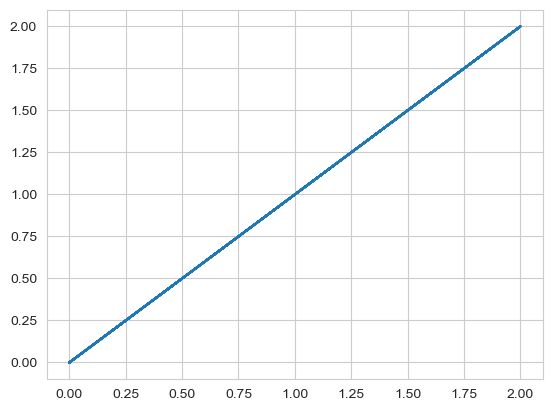

In [25]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred2 = log_reg.predict(X_test_scaled)

print("confusion_matrix: \n", confusion_matrix(y_test, y_pred2))
print("accuracy score: ", accuracy_score(y_test, y_pred2))
print("classification report: ", classification_report(y_test, y_pred2))
print(log_reg.coef_)

plt.plot(y_test, y_pred2)
plt.show()

confusion_matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy score:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



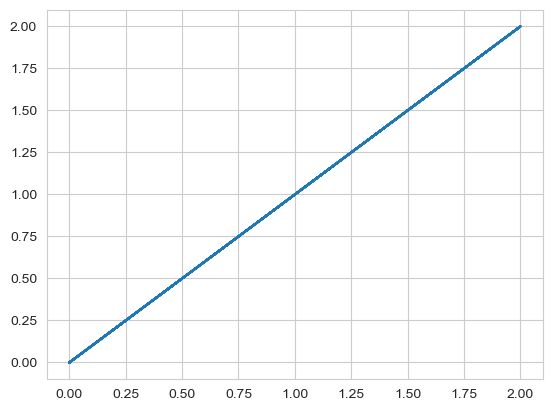

In [26]:
# OneVsOneClassifier
onevsonemodel = OneVsOneClassifier(LogisticRegression())
onevsonemodel.fit(X_train_scaled, y_train)
y_pred3 = onevsonemodel.predict(X_test_scaled)

print("confusion_matrix: \n", confusion_matrix(y_test, y_pred3))
print("accuracy score: ", accuracy_score(y_test, y_pred3))
print("classification report: ", classification_report(y_test, y_pred3))

plt.plot(y_test, y_pred3)
plt.show()

confusion_matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy score:  1.0
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



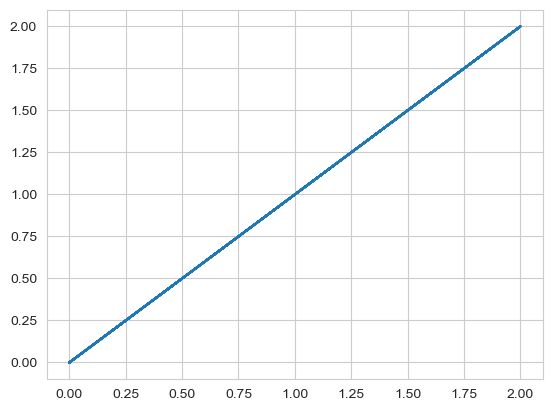

In [28]:
# OneVsRestClassifier
onevsrestmodel = OneVsRestClassifier(LogisticRegression())
onevsrestmodel.fit(X_train_scaled, y_train)
y_pred4 = onevsrestmodel.predict(X_test_scaled)

print("confusion_matrix: \n", confusion_matrix(y_test, y_pred4))
print("accuracy score: ", accuracy_score(y_test, y_pred4))
print("classification report: \n", classification_report(y_test, y_pred4))

plt.plot(y_test, y_pred4)
plt.show()

confusion_matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy score:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



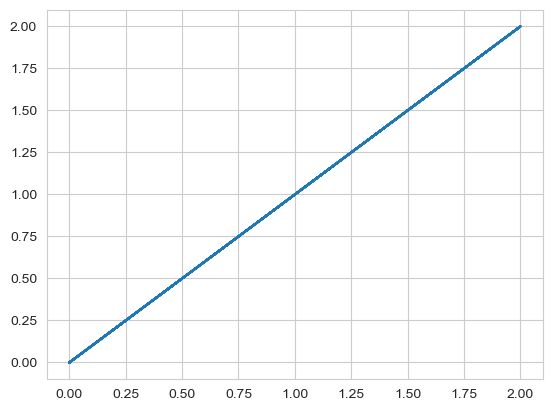

In [29]:
# SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred5 = svc.predict(X_test_scaled)

print("confusion_matrix: \n", confusion_matrix(y_test, y_pred5))
print("accuracy score: ", accuracy_score(y_test, y_pred5))
print("classification report: ", classification_report(y_test, y_pred5))

plt.plot(y_test, y_pred5)
plt.show()

## Modeling features in paired combinations

In [30]:
feature_list = list()
for i in range(len(df.columns.drop("Species"))):
    for j in range(i+1, len(df.columns.drop("Species"))):
        feature_list.append((df.columns[i], df.columns[j]))

print(feature_list)

[('SepalLengthCm', 'SepalWidthCm'), ('SepalLengthCm', 'PetalLengthCm'), ('SepalLengthCm', 'PetalWidthCm'), ('SepalWidthCm', 'PetalLengthCm'), ('SepalWidthCm', 'PetalWidthCm'), ('PetalLengthCm', 'PetalWidthCm')]


In [31]:
models = {
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "GaussianNB": GaussianNB()
}


results = []

for f1, f2 in feature_list:
    X = df[[f1, f2]]
    y = df["Species"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        results.append((f1, f2, name, acc))

In [32]:
result = pd.DataFrame(results, columns=["Feature1", "Feature2", "Model", "AccuracyScore"])

for model_name, group in result.groupby("Model"):
    group = group.sort_values(by="AccuracyScore").reset_index()
    print("\n", model_name)
    print(group[["Feature1", "Feature2", "AccuracyScore"]])
    print()


 GaussianNB
        Feature1       Feature2  AccuracyScore
0  SepalLengthCm   SepalWidthCm       0.868421
1  SepalLengthCm  PetalLengthCm       0.947368
2   SepalWidthCm  PetalLengthCm       0.973684
3   SepalWidthCm   PetalWidthCm       0.973684
4  SepalLengthCm   PetalWidthCm       1.000000
5  PetalLengthCm   PetalWidthCm       1.000000


 LogisticRegression
        Feature1       Feature2  AccuracyScore
0  SepalLengthCm   SepalWidthCm       0.842105
1  SepalLengthCm  PetalLengthCm       0.921053
2   SepalWidthCm  PetalLengthCm       0.947368
3   SepalWidthCm   PetalWidthCm       0.973684
4  SepalLengthCm   PetalWidthCm       1.000000
5  PetalLengthCm   PetalWidthCm       1.000000


 SVM
        Feature1       Feature2  AccuracyScore
0  SepalLengthCm   SepalWidthCm       0.815789
1   SepalWidthCm  PetalLengthCm       0.947368
2  SepalLengthCm  PetalLengthCm       0.973684
3   SepalWidthCm   PetalWidthCm       0.973684
4  SepalLengthCm   PetalWidthCm       1.000000
5  PetalLengthCm  

In [33]:
# hyperparameter tuning for Logistic Regression and SVM

In [34]:
models = {
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC()}


params = {
    "LogisticRegression": {"penalty": ['l1', 'l2', 'elasticnet'], 
                           "C": [100, 10, 1, 0.1, 0.01], 
                           "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga", "newton-cholesky"]},
    "SVM": {"C": [0.1, 1, 10, 100, 1000],
            "kernel": ["rbf", "linear"],
            "gamma": ["scale", "auto"]}}


result2 = []

for f1, f2 in feature_list:
    X = df[[f1, f2]]
    y = df["Species"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    for name, model in models.items():
        if name in params:
            grid = GridSearchCV(estimator=model, param_grid=params[name], cv=5)
            grid.fit(X_train_scaled, y_train)
            y_pred = grid.predict(X_test_scaled)
            acc = accuracy_score(y_test, y_pred)
            result2.append((f1, f2, name, acc, grid.best_params_))

In [35]:
pd.set_option('display.width', 1000)

In [36]:
result = pd.DataFrame(result2, columns=["Feature1", "Feature2", "Model", "AccuracyScore", "best_params"])

for model_name, group in result.groupby("Model"):
    group = group.sort_values(by="AccuracyScore").reset_index()
    print("\n", model_name)
    print(group[["Feature1", "Feature2", "AccuracyScore", "best_params"]])


 LogisticRegression
        Feature1       Feature2  AccuracyScore                                        best_params
0  SepalLengthCm   SepalWidthCm       0.842105      {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
1   SepalWidthCm  PetalLengthCm       0.921053      {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
2  SepalLengthCm  PetalLengthCm       0.947368      {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
3  SepalLengthCm   PetalWidthCm       0.973684        {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
4   SepalWidthCm   PetalWidthCm       0.973684        {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
5  PetalLengthCm   PetalWidthCm       1.000000  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...

 SVM
        Feature1       Feature2  AccuracyScore                                       best_params
0  SepalLengthCm   SepalWidthCm       0.868421   {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
1   SepalWidthCm  PetalLengthCm       0.921053      {'C': 10, 'gamma': 'scale', 'kernel': 'rb